<a href="https://colab.research.google.com/github/ayush1804027/Ayush/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
SEED=1234
NUM_of_samples=50

In [27]:
np.random.seed(SEED)

In [28]:
def generate_data(samples):
  X=np.array(range(samples))
  random_noise=np.random.uniform(-10,20,size=samples)
  Y=3.5*X+random_noise
  return X,Y

In [31]:
X,Y=generate_data(samples=NUM_of_samples)
data=np.vstack([X,Y]).T
print(data[:5])

[[ 0.         13.01349885]
 [ 1.         14.74346086]
 [ 2.         20.90601551]
 [ 3.         17.23282485]
 [ 4.         32.97509596]]


In [32]:
df=pd.DataFrame(data,columns=['X','Y'])
X=df[['X']].values
Y=df[['Y']].values
df.head()

,X,Y
0,0.0,13.013499
1,1.0,14.743461
2,2.0,20.906016
3,3.0,17.232825
4,4.0,32.975096


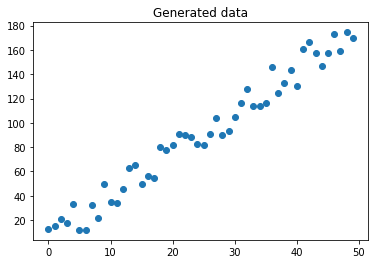

In [33]:
plt.title("Generated data")
plt.scatter(x=df['X'],y=df['Y'])
plt.show()

In [34]:
TRAIN_SIZE=0.70
VAL_SIZE=0.15
TEST_SIZE=0.15

In [35]:
indices=list(range(NUM_of_samples))
np.random.shuffle(indices)
X=X[indices]
Y=Y[indices]

In [36]:
train_start=0
train_end=int(0.7*NUM_of_samples)
val_start=train_end
val_end=int((TRAIN_SIZE+VAL_SIZE)*NUM_of_samples)
test_start=val_end

In [37]:
X_train=X[train_start:train_end]
Y_train=Y[train_start:train_end]
X_val=X[val_start:val_end]
Y_val=Y[val_start:val_end]
X_test=X[test_start:]
Y_test=Y[test_start:]


In [38]:
print(f"X_train:{X_train.shape},Y_train:{Y_train.shape}")
print(f"X_val:{X_val.shape},Y_val:{Y_val.shape}")
print(f"X_test:{X_test.shape},Y_test:{Y_test.shape}")

X_train:(35, 1),Y_train:(35, 1)
X_val:(7, 1),Y_val:(7, 1)
X_test:(8, 1),Y_test:(8, 1)


In [39]:
def standardize_data(data,mean,std):
  return (data-mean)/std

In [40]:
X_mean=np.mean(X_train)
X_std=np.std(X_train)
Y_mean=np.mean(Y_train)
Y_std=np.std(Y_train)

In [41]:
X_train=standardize_data(X_train,X_mean,X_std)
Y_train=standardize_data(Y_train,Y_mean,Y_std)
X_val=standardize_data(X_val,X_mean,X_std)
Y_val=standardize_data(Y_val,Y_mean,Y_std)
X_test=standardize_data(X_test,X_mean,X_std)
Y_test=standardize_data(Y_test,Y_mean,Y_std)

In [42]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(Y_test, axis=0)[0]:.1f}, std: {np.std(Y_test, axis=0)[0]:.1f}")

mean: 0.3, std: 1.0
mean: 0.5, std: 0.9


In [44]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = Y_train.shape[1] # y is 1-dimensional

In [45]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [47]:
Y_pred = np.dot(X_train, W) + b
print (f"Y_pred: {Y_pred.shape}")

Y_pred: (35, 1)


In [48]:
N = len(Y_train)
loss = (1/N) * np.sum((Y_train - Y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 1.02


In [50]:
# Backpropagation
dW = -(2/N) * np.sum((Y_train - Y_pred) * X_train)
db = -(2/N) * np.sum((Y_train - Y_pred) * 1)

In [51]:
LEARNING_RATE = 1e-1
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [52]:
NUM_EPOCHS = 100
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    Y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/len(Y_train)) * np.sum((Y_train - Y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = -(2/N) * np.sum((Y_train - Y_pred) * X_train)
    db = -(2/N) * np.sum((Y_train - Y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.993
Epoch: 10, loss: 0.044
Epoch: 20, loss: 0.033
Epoch: 30, loss: 0.033
Epoch: 40, loss: 0.033
Epoch: 50, loss: 0.033
Epoch: 60, loss: 0.033
Epoch: 70, loss: 0.033
Epoch: 80, loss: 0.033
Epoch: 90, loss: 0.033


In [53]:
pred_train = W*X_train + b
pred_test = W*X_test + b

train_mse = np.mean((Y_train - pred_train) ** 2)
test_mse = np.mean((Y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.06


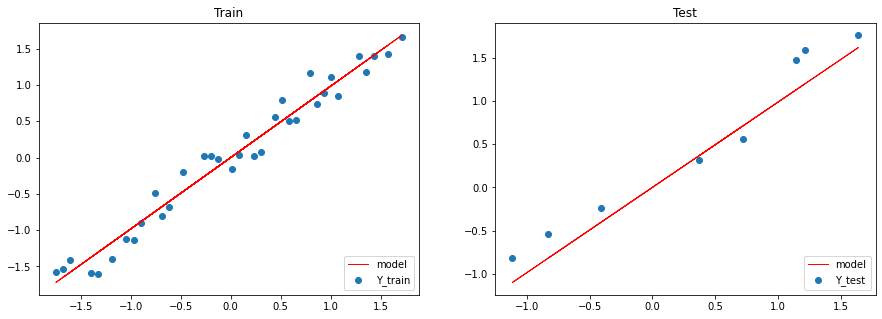

In [55]:
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, Y_train, label='Y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, Y_test, label='Y_test')
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()

In [56]:
W_unscaled = W * (Y_std/X_std)
b_unscaled = b * Y_std + Y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] Y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] Y = 3.5X + noise
[model] y_hat = 3.4X + 5.9
